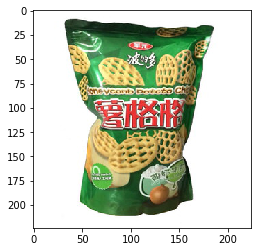

n03871628-packet, 0.198660090566
n03908618-pencil_box, 0.0752222687006
n03188531-diaper, 0.0627053380013


In [3]:
from keras.preprocessing import image
import matplotlib.pyplot as plt

img = image.load_img("../../tmp/potato.jpg", target_size=(224, 224))
plt.imshow(img)
plt.show()

import keras.applications.vgg16 as vgg16
import numpy as np

model = vgg16.VGG16(weights='imagenet')
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = vgg16.preprocess_input(x)
preds = model.predict(x)
classes = ['{}-{}, {}'.format(t[0], t[1], t[2]) for t in vgg16.decode_predictions(preds, top=3)[0]]
for c in classes:
    print c        

ValueError: 'norm' must be an instance of 'mcolors.Normalize'

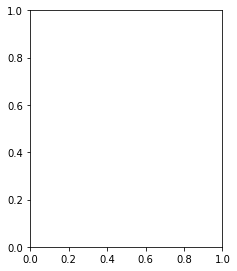

In [7]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

datagen = ImageDataGenerator(
        rescale=1. / 255,
        height_shift_range=0.1,
        zoom_range=0.6,
        fill_mode='nearest'
    )

img = image.load_img("../../tmp/potato.jpg", target_size=(224, 224))
img = image.img_to_array(img)
imgs = [ img ]
x = np.asarray(imgs)

i = 0
plt.figure(figsize=(20, 20))
for x_batch in datagen.flow(x, batch_size=1):
    i = i + 1
    plt.subplot(4, 5, i)
    plt.imshow(4, 5, x_batch[0])
    break
    


In [ ]:



import keras.applications.vgg16 as vgg16
import keras.layers as layers

base_model = vgg16.VGG16(include_top=False, input_shape=(224, 224, 3))

x = base_model.output
x = layers.Flatten(name='flatten')(x)
x = layers.Dense(256, activation='relu', name='fc1')(x)
x = layers.Dense(256, activation='relu', name='fc2')(x)
predictions = layers.Dense(10, activation='softmax', name='predictions')(x)
model = Model(inputs=base_model.input , outputs=predictions)
model.load_weights('../image_search/data_sub.1step.block5.fc-u256.aug.h5')



